# DataFrame to search age of abalone

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

## Defining colors

In [2]:
sex_color = {
    'M': '#ff6602ff',
    'I': '#0f7175ff',
    'F': '#c65dc9ff'
}

## Check dataframe

### Reading files

In [3]:
columns_name = [
    'sex', 'length', 'diameter', 'height', 'whole_height', 'shucked_weight',
    'viscera_weight', 'shell_weight', 'rings'
]
df = pd.read_csv('../../data/raw/Abalone/abalone.data.csv', names=columns_name)
df.head()

sex  length  diameter  height  whole_height  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

### Calculate age using rings, age = rings[value] + 1.5

In [4]:
df['age'] = df['rings'].apply(lambda x: x + 1.5)
df.head()

sex  length  diameter  height  whole_height  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings   age  
0         0.150     15  16.5  
1         0.070      7   8.5  
2         0.210      9  10.5  
3         0.155     10  11.5  
4         0.055      7   8.5

### Transforming value of sex to categorical variable using pandas

In [5]:
df['sex'] = df['sex'].astype("category")
df.head()

sex  length  diameter  height  whole_height  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings   age  
0         0.150     15  16.5  
1         0.070      7   8.5  
2         0.210      9  10.5  
3         0.155     10  11.5  
4         0.055      7   8.5

### Check dtypes in dataframe

In [6]:
df.dtypes

sex               category
length             float64
diameter           float64
height             float64
whole_height       float64
shucked_weight     float64
viscera_weight     float64
shell_weight       float64
rings                int64
age                float64
dtype: object

### Number of types in dataframe

In [7]:
df.dtypes.value_counts()

float64     8
category    1
int64       1
dtype: int64

### Search Nonetypes in dataframe

In [8]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_height      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
age               0
dtype: int64

## Graphics

### Getting statistics

In [9]:
df.describe(include="all")

sex       length     diameter       height  whole_height  \
count   4177  4177.000000  4177.000000  4177.000000   4177.000000   
unique     3          NaN          NaN          NaN           NaN   
top        M          NaN          NaN          NaN           NaN   
freq    1528          NaN          NaN          NaN           NaN   
mean     NaN     0.523992     0.407881     0.139516      0.828742   
std      NaN     0.120093     0.099240     0.041827      0.490389   
min      NaN     0.075000     0.055000     0.000000      0.002000   
25%      NaN     0.450000     0.350000     0.115000      0.441500   
50%      NaN     0.545000     0.425000     0.140000      0.799500   
75%      NaN     0.615000     0.480000     0.165000      1.153000   
max      NaN     0.815000     0.650000     1.130000      2.825500   

        shucked_weight  viscera_weight  shell_weight        rings          age  
count      4177.000000     4177.000000   4177.000000  4177.000000  4177.000000  
unique             NaN             NaN           NaN          NaN          NaN  
top                NaN             NaN           NaN          NaN          NaN  
freq               NaN             NaN           NaN          NaN          NaN  
mean          0.359367        0.180594      0.238831     9.933684    11.433684  
std           0.221963        0.109614      0.139203     3.224169     3.224169  
min           0.001000        0.000500      0.001500     1.000000     2.500000  
25%           0.186000        0.093500      0.130000     8.000000     9.500000  
50%           0.336000        0.171000      0.234000     9.000000    10.500000  
75%           0.502000        0.253000      0.329000    11.000000    12.500000  
max           1.488000        0.760000      1.005000    29.000000    30.500000

### Only numerics

In [10]:
df.describe()

length     diameter       height  whole_height  shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera_weight  shell_weight        rings          age  
count     4177.000000   4177.000000  4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684    11.433684  
std          0.109614      0.139203     3.224169     3.224169  
min          0.000500      0.001500     1.000000     2.500000  
25%          0.093500      0.130000     8.000000     9.500000  
50%          0.171000      0.234000     9.000000    10.500000  
75%          0.253000      0.329000    11.000000    12.500000  
max          0.760000      1.005000    29.000000    30.500000

### Only category

In [11]:
df.describe(include='category')

sex
count   4177
unique     3
top        M
freq    1528

### Size of dataframe and headers

In [12]:
df.shape, df.columns.tolist()

((4177, 10),
 ['sex',
  'length',
  'diameter',
  'height',
  'whole_height',
  'shucked_weight',
  'viscera_weight',
  'shell_weight',
  'rings',
  'age'])

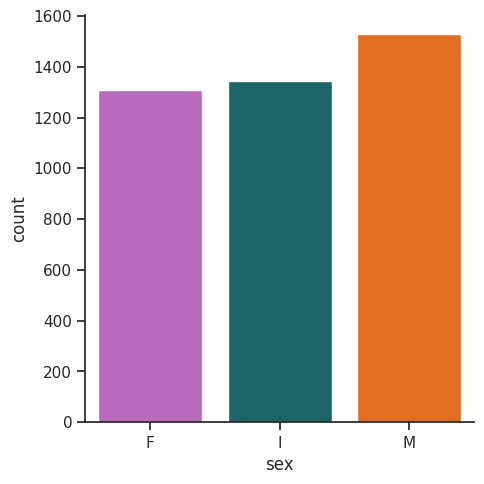

In [13]:
sns.set_theme(style="ticks", palette="pastel")
sns.catplot(data=df, x="sex", kind="count", palette=sex_color)
plt.show()

In [14]:
rows, colums = (2, 4)
f, axs = plt.subplots(
    rows, colums,
    figsize=(20,8),
    sharey=True
)

for i in range(rows):
    for j in range(colums):
        sns.histplot(
            data=df,
            x=columns_name[(i * colums) + j + 1],
            ax=axs[i][j]
        )

plt.show()

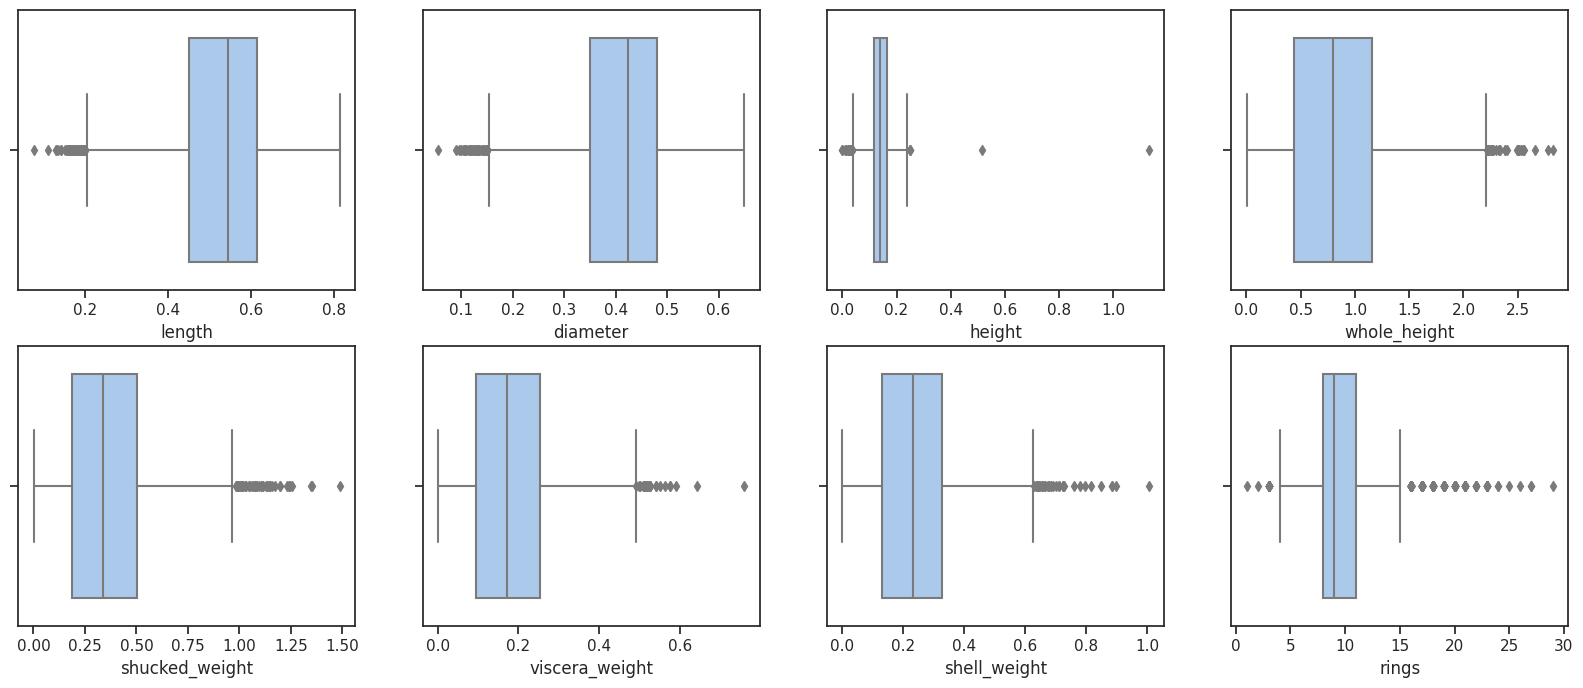

In [15]:
rows, colums = (2, 4)
f, axs = plt.subplots(
    rows, colums,
    figsize=(20,8),
    sharey=True
)

for i in range(rows):
    for j in range(colums):
        sns.boxplot(
            data=df,
            x=columns_name[(i * colums) + j + 1],
            ax=axs[i][j]
        )

plt.show()

## Obteniendo medidas de tendencia central

### Media

In [16]:
df.mean(numeric_only=True)

length             0.523992
diameter           0.407881
height             0.139516
whole_height       0.828742
shucked_weight     0.359367
viscera_weight     0.180594
shell_weight       0.238831
rings              9.933684
age               11.433684
dtype: float64

### Mediana

In [17]:
df.median(numeric_only=True)

length             0.5450
diameter           0.4250
height             0.1400
whole_height       0.7995
shucked_weight     0.3360
viscera_weight     0.1710
shell_weight       0.2340
rings              9.0000
age               10.5000
dtype: float64

### Moda

In [18]:
df.mode()

sex  length  diameter  height  whole_height  shucked_weight  \
0    M   0.550      0.45    0.15        0.2225           0.175   
1  NaN   0.625       NaN     NaN           NaN             NaN   

   viscera_weight  shell_weight  rings   age  
0          0.1715         0.275    9.0  10.5  
1             NaN           NaN    NaN   NaN

## Medidas de dispersion

### Valor maximo

In [19]:
df.max(numeric_only=True)

length             0.8150
diameter           0.6500
height             1.1300
whole_height       2.8255
shucked_weight     1.4880
viscera_weight     0.7600
shell_weight       1.0050
rings             29.0000
age               30.5000
dtype: float64

### Valor minimo

In [20]:
df.min(numeric_only=True)

length            0.0750
diameter          0.0550
height            0.0000
whole_height      0.0020
shucked_weight    0.0010
viscera_weight    0.0005
shell_weight      0.0015
rings             1.0000
age               2.5000
dtype: float64

### Rango de varibles

In [21]:
df.max(numeric_only=True) - df.min(numeric_only=True)

length             0.7400
diameter           0.5950
height             1.1300
whole_height       2.8235
shucked_weight     1.4870
viscera_weight     0.7595
shell_weight       1.0035
rings             28.0000
age               28.0000
dtype: float64

### Desviacion estandar

In [22]:
df.std(numeric_only=True)

length            0.120093
diameter          0.099240
height            0.041827
whole_height      0.490389
shucked_weight    0.221963
viscera_weight    0.109614
shell_weight      0.139203
rings             3.224169
age               3.224169
dtype: float64

## Obteniendo los rangos intercuartilicos

### cuartil 25

In [23]:
df.quantile(0.25)

length            0.4500
diameter          0.3500
height            0.1150
whole_height      0.4415
shucked_weight    0.1860
viscera_weight    0.0935
shell_weight      0.1300
rings             8.0000
age               9.5000
Name: 0.25, dtype: float64

### cuartil 75

In [24]:
df.quantile(0.75)

length             0.615
diameter           0.480
height             0.165
whole_height       1.153
shucked_weight     0.502
viscera_weight     0.253
shell_weight       0.329
rings             11.000
age               12.500
Name: 0.75, dtype: float64

### IQR

In [25]:
df.quantile(0.75) - df.quantile(0.25)

length            0.1650
diameter          0.1300
height            0.0500
whole_height      0.7115
shucked_weight    0.3160
viscera_weight    0.1595
shell_weight      0.1990
rings             3.0000
age               3.0000
dtype: float64

### Pasando todos los datos de los cuartiles

In [26]:
df.quantile(q=[0.75, 0.5, 0.25]).transpose().rename_axis('variable').reset_index().assign(
    iqr=lambda df_l: df_l[0.75] - df_l[0.25]
)

variable    0.75      0.5    0.25     iqr
0          length   0.615   0.5450  0.4500  0.1650
1        diameter   0.480   0.4250  0.3500  0.1300
2          height   0.165   0.1400  0.1150  0.0500
3    whole_height   1.153   0.7995  0.4415  0.7115
4  shucked_weight   0.502   0.3360  0.1860  0.3160
5  viscera_weight   0.253   0.1710  0.0935  0.1595
6    shell_weight   0.329   0.2340  0.1300  0.1990
7           rings  11.000   9.0000  8.0000  3.0000
8             age  12.500  10.5000  9.5000  3.0000

## Analisis BiVariable

In [27]:
y = "rings"

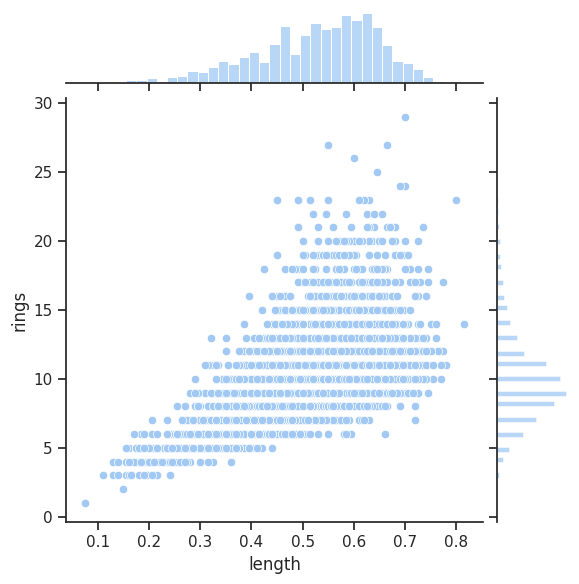

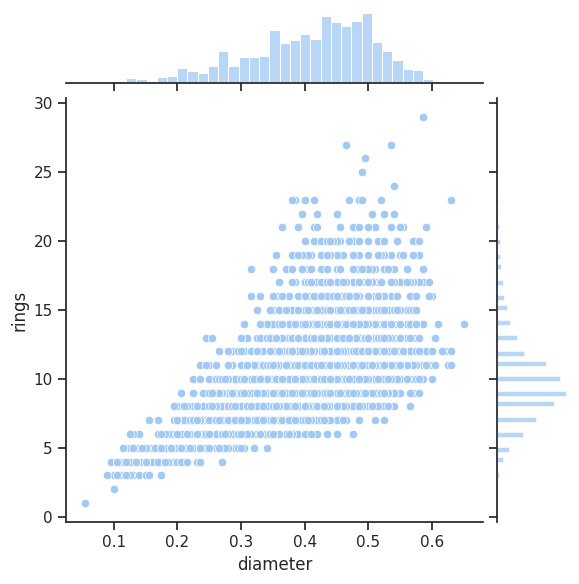

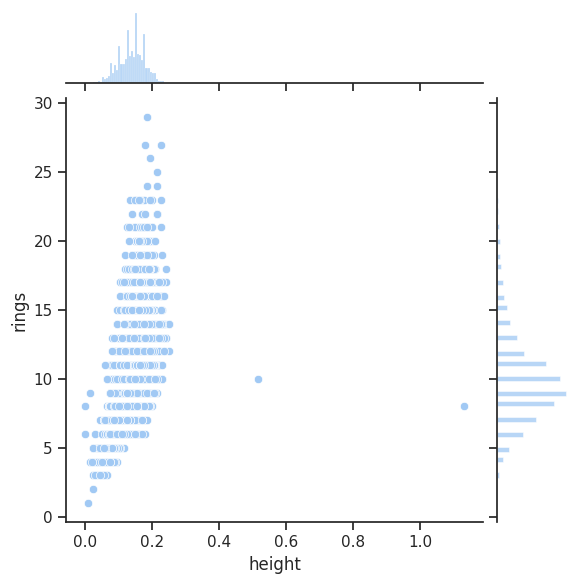

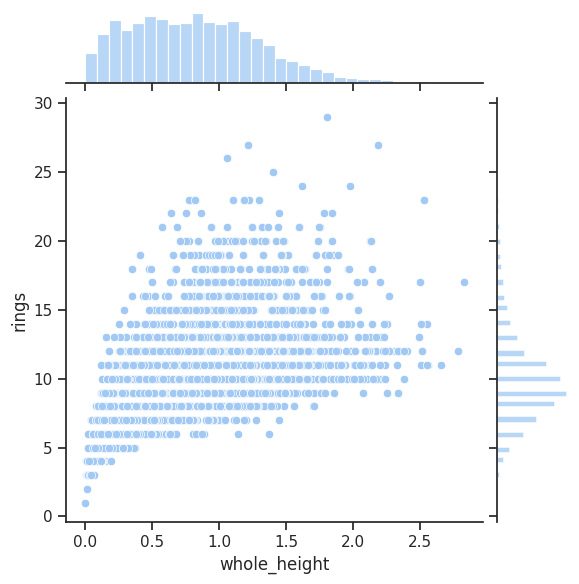

In [28]:
rows = 8

for i in range(rows):
    sns.jointplot(
        data=df,
        x=columns_name[i + 1],
        y=y
    )

plt.show()

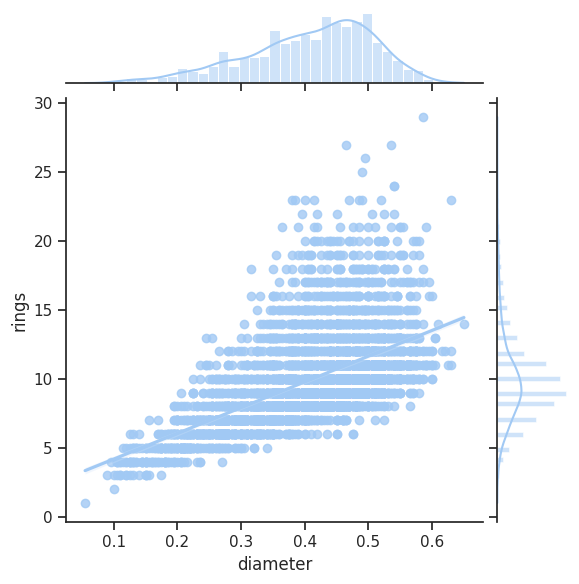

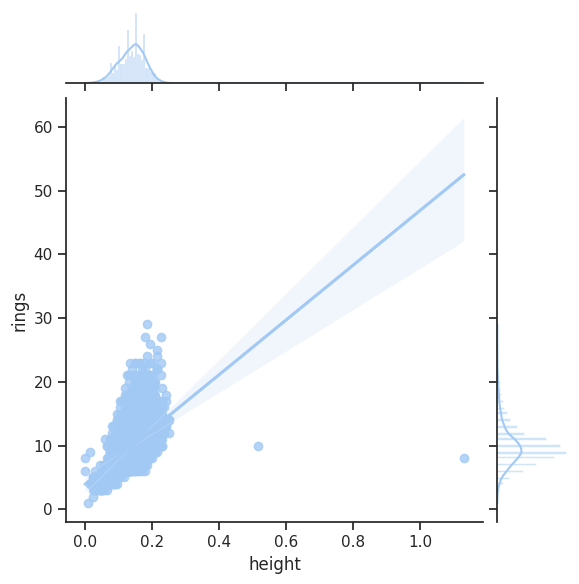

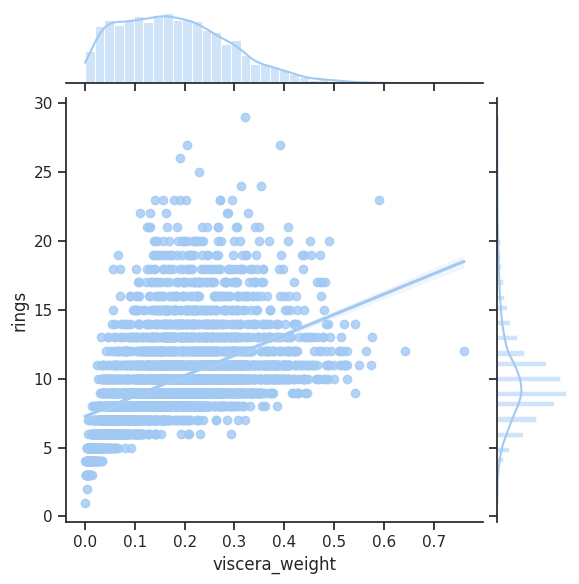

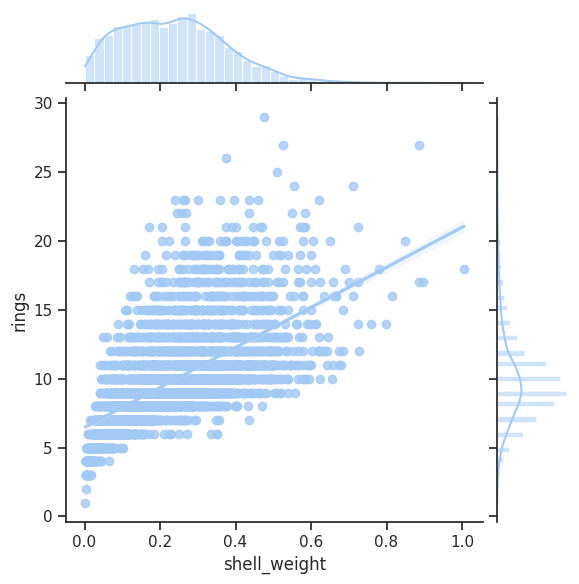

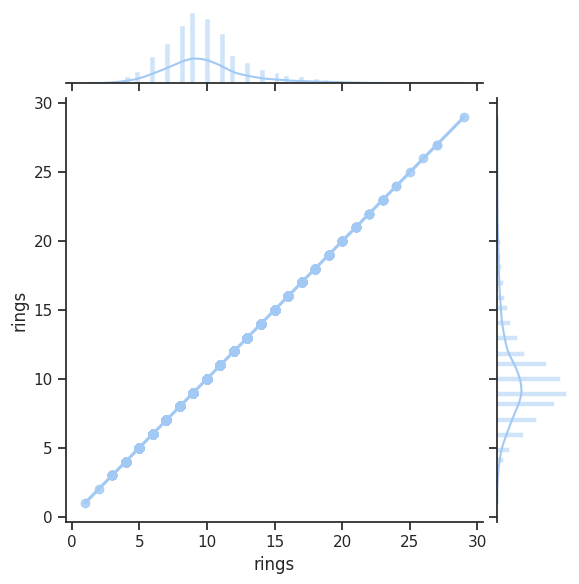

In [29]:
rows = 8

for i in range(rows):
    sns.jointplot(
        data=df,
        x=columns_name[i + 1],
        y=y,
        kind='reg'
    )

plt.show()

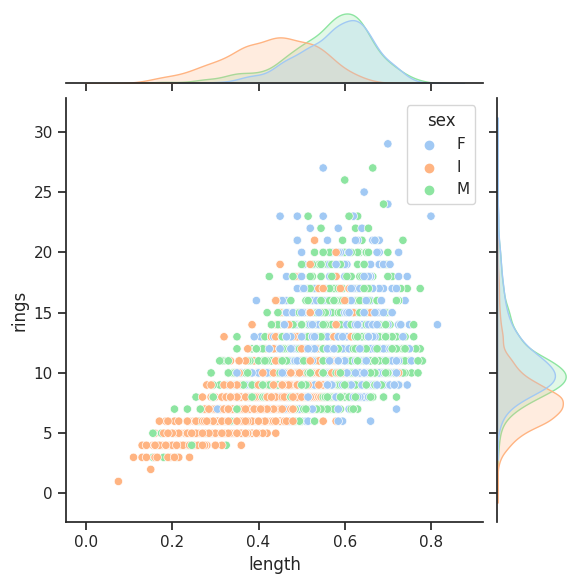

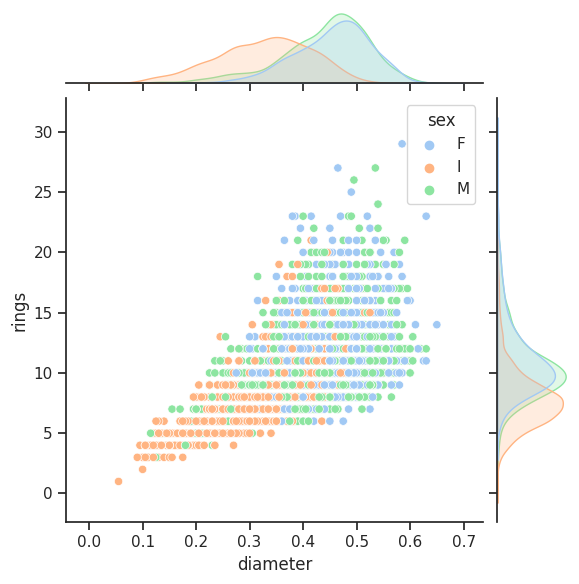

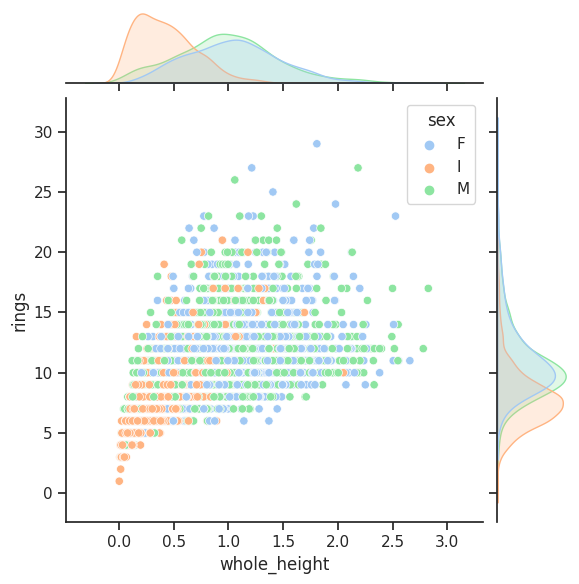

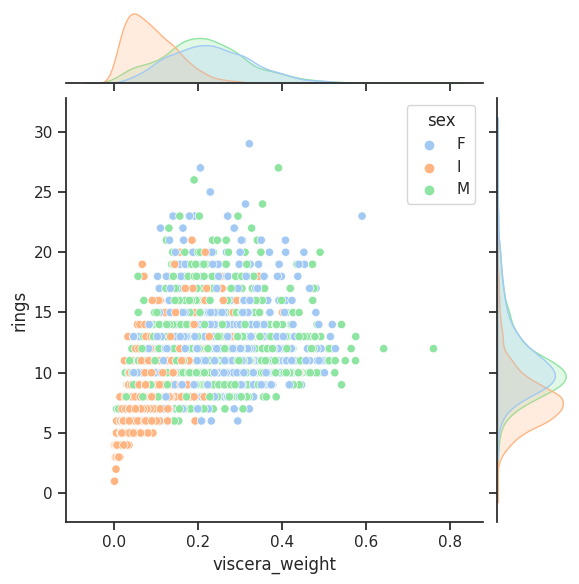

In [30]:
rows = 8

for i in range(rows):
    sns.jointplot(
        data=df,
        x=columns_name[i + 1],
        y=y,
        hue="sex"
    )

plt.show()

### Calculate correlation

In [31]:
f, axs = plt.subplots(
    figsize=(20, 8)
)

df_correlation = df.assign(numeric_sex=lambda df: df.sex.replace(['M', 'F', 'I'], [0, 1, 2]))
df_correlation["numeric_sex"] = df_correlation["numeric_sex"].astype("int32")

sns.heatmap(
    data=df_correlation.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

plt.show()
df_correlation.head()

sex  length  diameter  height  whole_height  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings   age  numeric_sex  
0         0.150     15  16.5            0  
1         0.070      7   8.5            0  
2         0.210      9  10.5            1  
3         0.155     10  11.5            0  
4         0.055      7   8.5            2

In [32]:
df_correlation.dtypes

sex               category
length             float64
diameter           float64
height             float64
whole_height       float64
shucked_weight     float64
viscera_weight     float64
shell_weight       float64
rings                int64
age                float64
numeric_sex          int32
dtype: object